<a href="https://colab.research.google.com/github/manassanant132/Fundamental-of-Deep-Learning/blob/main/Unit12_Evaluation_Metrics_for_Classification_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Accuracy และ Loss เป็นเครื่องมือมาตรฐานที่ใช้ในการวัด (Metric) หรือประเมิน Classification Model แต่การจะประเมิน Model เพียงจาก Accuracy และ Loss อาจทำให้เกิดการเข้าใจผิดจนเกิดการเลือก Model ที่ไม่ดีมาแทน Model ที่ดี หรืออาจทำให้ไม่สามารถแก้ปัญหาในระหว่างการพัฒนา Model ได้อย่างตรงจุด

บทความนี้ ผู้อ่านจะได้เห็นการใช้งานเครื่องมือต่างๆ ได้แก่ Confusion Matrix, Precision, Recall, F1-score, ROC (Receiver Operating Characteristics) และ AUC (Area Under The Curve) ในการประเมิน Binary Classification Model ซึ่งเมื่อได้ทำความเข้าใจแนวคิดหลักๆ ของเครื่องมือเหล่านี้ดีแล้ว เราจะนำมันไปประยุกต์ใช้สำหรับการประเมิน Multi-Class Classification Model ในหัวข้อสุดท้ายของบทความ

#Binary Classification Evaluation

สมมติว่ามีบุคคล 2 กลุ่ม กลุ่มหนึ่งติดเชื้อไวรัส โคโรนา อีกกลุ่มไม่ติดเชื้อ ซึ่งสามารถวินิจฉัยได้จากภาพ X-ray ปอดของพวกเขา ในการแยกประเภทบุคคลเป็น 2 กลุ่ม คือ ปอดติดเชื้อ และปอดไม่ติดเชื้อ เราจะพัฒนา Model แบบ Binary Classification ครับ

Binary Classification เป็น Model ที่มีการกำหนด Label หรือ Class เพียง 2 Class คือ เป็น Class 0 (ไม่ติดเชื้อ) กับเป็น Class 1 (ติดเชื้อ) ซึ่งผลลัพธ์จากการทำนายของ Model จะบอกว่ามีโอกาสที่จะเป็น Class 1 กี่เปอร์เซ็นต์

เพื่อจะทำให้ Neural Network Model ทำนายผลออกมาเป็นค่าความเชื่อมั่นซึ่งมีค่าตั้งแต่ 0-1 เราจะต้องคอนฟิก Activate Function ใน Output Layer แบบ Sigmoid

ซึ่งโดย Default แล้ว Binary Classification Model จะทำนายว่าเป็น Class 1 เมื่อมีค่าความเชื่อมั่นมากกว่า 0.5

เราเรียกผลการทำนายกลุ่มคนที่ติดเชื้อ ที่ Model ทำนายถูกเป็นติดเชื้อว่า True Possitive (TP) และเรียกผลการทำนายกลุ่มคนที่ไม่ติดเชื้อ ที่ Model ทำนายถูกเป็นไม่ติดเชื้อว่า True Negative (TN)

อย่างไรก็ตาม อาจจะมีภาพ X-ray ปอดบางภาพที่ดูเหมือนไม่ติดเชื้อ แต่เกิดการติดเชื้อ (False Negative:FN) และภาพปอดที่ดูเหมือนติดเชื้อ แต่จริงๆ แล้วไม่ติด (False Positive:FP) ได้เช่นกัน ซึ่งในกรณีของการทำนายว่ามีการติดเชื้อไวรัสโคโรนาหรือไม่ เราจะซีเรียสกับผลของการทำนายว่าไม่ติดเชื้อแต่จริงๆ แล้วติดเชื้อ (FN) มากกว่าการทำนายว่าติดเชื้อ แต่จริงๆ แล้วไม่ติด (FP) เพราะถ้าไม่ได้รับการดูแลรักษาที่ถูกต้องรวดเร็ว จะส่งผลให้เชื้อไวรัสแพร่กระจายเป็นอันตรายถึงชีวิต รวมทั้งคนที่ติดเชื้อเหล่านั้นอาจไม่ระมัดระวังตัว จนไปแพร่เชื้อให้กับคนใกล้ชิดได้ครับ

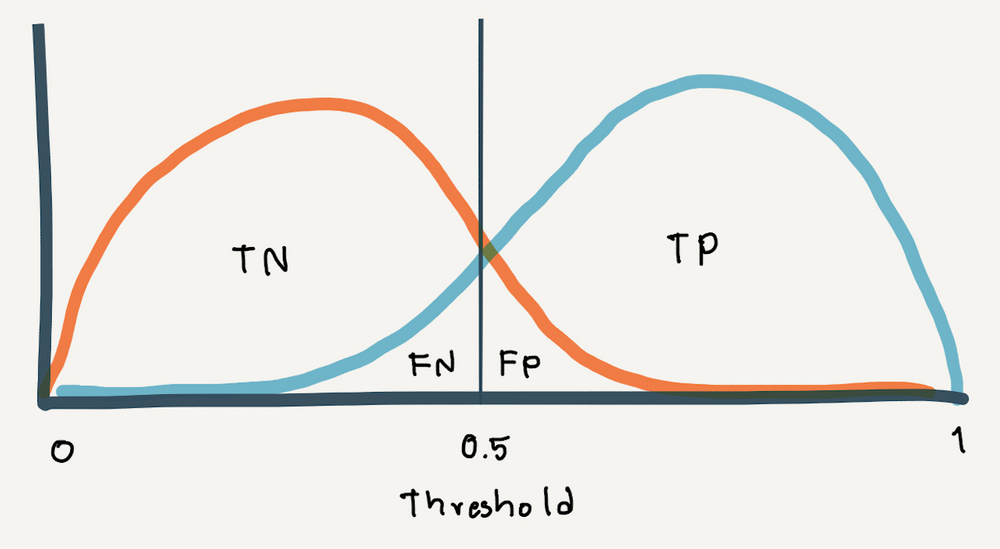

##Confusion Matrix, Recall และ Precision
เราจะวางผลการทำนายในแบบต่างๆ ลงในตาราง Confusion Matrix ดังต่อไปนี้

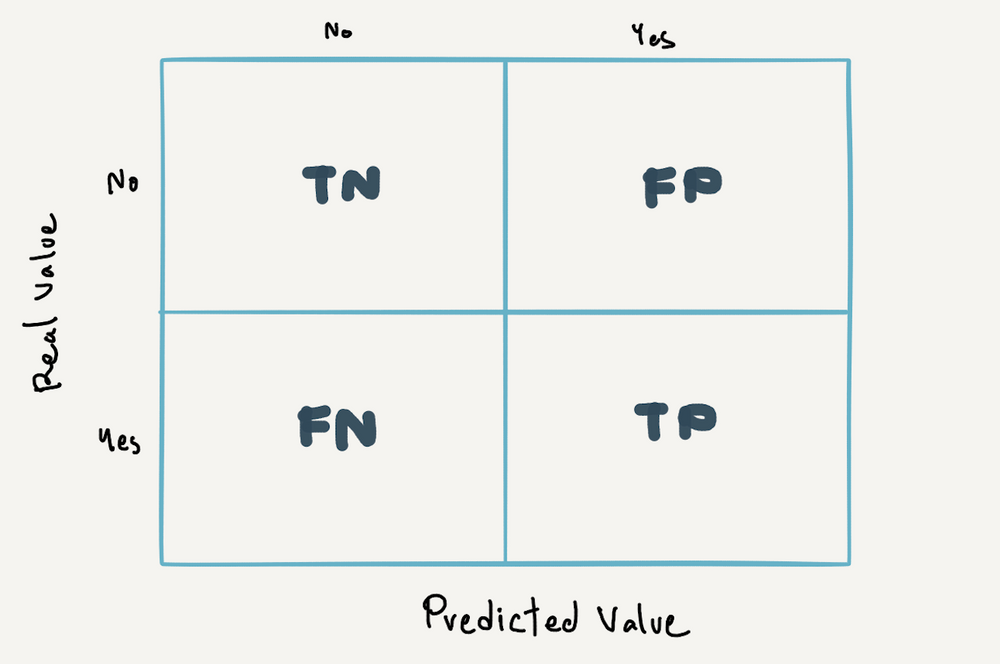

ซึ่งจาก Confusion Matrix จะสามารถคำนวนค่า Recall หรือ Sensitivity หรือ True Positive Rate ที่แสดงถึงประสิทธิภาพของ Model เมื่อเราซีเรียสผลการทำนายแบบ False Negative ดังสมการด้านล่าง

Recall หรือ Sensitivity หรือ True Positive Rate = TP/(TP+FN)

และจะสามารถคำนวนณค่า Precision ที่แสดงถึงประสิทธิภาพของ Model เมื่อเราซีเรียสผลการทำนายแบบ False Positive เช่นในกรณีของการทำนายว่าเป็น Junk Mail หรือไม่เป็น Junk Mail ซึ่งเมื่อเกิดผลการทำนายแบบ False Positive หรือทำนาย Email ปกติเป็น Junk Mail จะทำให้ผู้รับพลาดการติดต่อเรื่องสำคัญได้ครับ

Precision = TP/(TP+FP)|

อย่างไรก็ตามถ้าเรามีการพัฒนา Model แบบที่ไม่ซีเรียสผลการทำนายแบบ False Negative หรือ False Positive เรื่องหนึ่งเรื่องใดเป็นหลัก เราจะวัดประสิทธิภาพของ Model จากค่า F1-score ซึ่งเป็นค่าเฉลี่ยฮาร์โมนิก (Harmonic Mean) ของ Precision และ Recall แทน



**F1-score** = 2 x (Precision x Recall)/(Precision + Recall)

ทั้งนี้ค่า Precision, Recall  และ F1-score ที่เกิดจาก Binary Classification Model ซึ่งทำนายว่าเป็น Class 1 หรือ Positive เมื่อมีการกำหนดค่า Threshold เป็นค่าหนึ่งค่าใด (Default Threshold = 0.5)

เพื่อจะลดผลการทำนายที่ทำให้เกิด False Negative สูง (เช่นในกรณีที่เราซีเรียสเรื่องการติดเชื้อ แต่ Model ทำนายผิดว่าไม่ติดเชื้อ) เราสามารถลดค่า Threshold ลง ซึ่งจะทำให้ False Positive Rate มีค่าสูงขึ้นแทน

False Positive Rate (FPR) = FP/(FP+TN)

การลดค่า Threshold จะทำให้ทั้ง Recall และ False Positive Rate สูงขึ้นด้วย ซึ่งจะต้องมีการ Trade-off ระหว่างประสิทธิภาพของ Model (Recall) และ False Positive Rate ที่ยอมรับได้ โดยเราจะได้เห็นความสัมพันธ์ของสองค่านี้จาก ROC Curve

ROC Curve เป็นกราฟที่แต่ละจุด (x, y) เป็นค่า False Positive Rate และ True Positive Rate (Recall) ซึ่งเกิดจากการขยับค่า Threshold ที่ต่างกัน โดยยิ่งมีการซ้อนทับของการกระจายตัวของค่าความเชื่อมั่นของทั้งสอง Class มากเท่าไหร่ เราก็จะเห็น ROC Curve มีความชันน้อยลงเท่านั้น

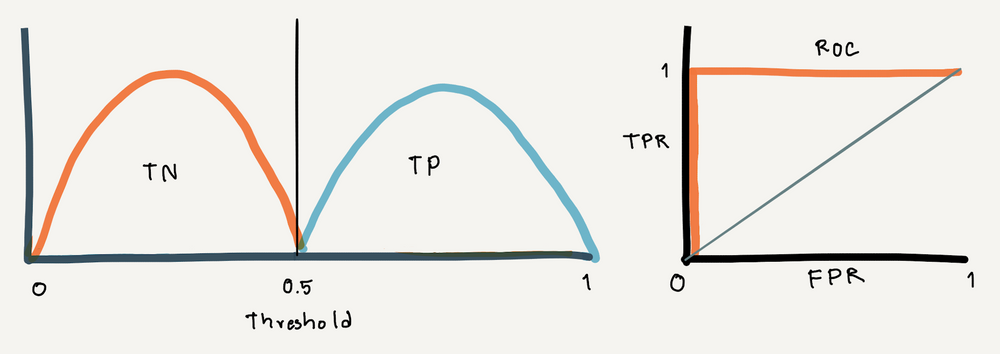

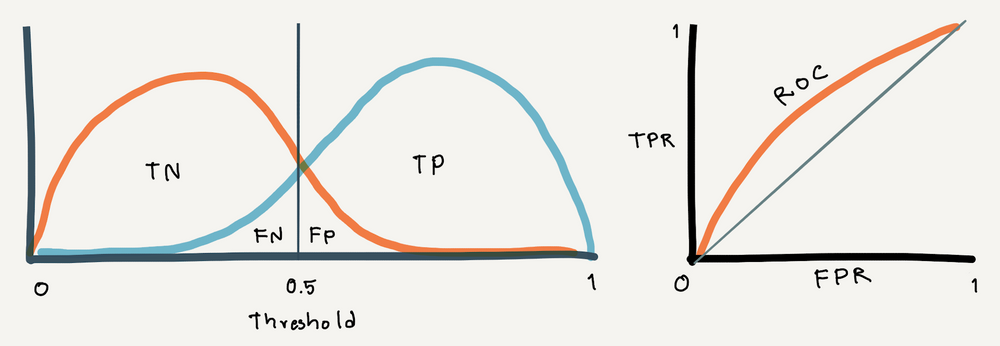

ถ้ามีการลากเส้นทะแยงมุมแบ่ง ROC Curve ออกเป็นสองส่วน ดังภาพด้านบน และกำหนดให้พื้นที่ใต้เส้นทะแยงมุมเท่ากับ 0.5 พื้นที่ใต้ ROC Curve ทั้งหมดจะมีค่าไม่เกิน 1 (100%)

ดังนั้นพื้นที่ใต้เส้นกราฟ (Area Under The Curve : AUC) จึงสามารถบอกได้ว่า Model ของเรามีความสามารถในการแยกการติดเชื้อออกจากการไม่ติดเชื้อได้ดีแค่ไหน

เราจะทดลอง Train Model แบบ Binary Classification จากข้อมูลที่ Make ขึ้นมาด้วยฟังก์ชัน make_circles ตามขั้นตอนต่อไปนี้

Import Library ที่จำเป็นต้องใช้

In [ ]:
import tensorflow as tf
fashion_mnist = tf.keras.datasets.fashion_mnist
to_categorical = tf.keras.utils.to_categorical

import matplotlib.pyplot as plt
from sklearn.datasets import make_circles
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

import pandas as pd
import numpy as np

import plotly.express as px
import plotly
import plotly.graph_objs as go
import plotly.figure_factory as ff
import seaborn as sn

from collections import Counter

สร้าง Dataset แบบ 2 Class โดยใช้ Function make_circles ของ Sklearn

In [ ]:
x, y =  make_circles(n_samples=5000, noise=0.1, random_state=1)

แบ่งข้อมูลสำหรับ Train และ Validate โดยการสุ่มในสัดส่วน 50:50

In [ ]:
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=0.5, shuffle= True)

x_train.shape, x_val.shape, y_train.shape, y_val.shape

((2500, 2), (2500, 2), (2500,), (2500,))

นำ Dataset ส่วนที่ Train มาแปลงเป็น DataFrame โดยเปลี่ยนชนิดข้อมูลใน Column "class" เป็น String เพื่อทำให้สามารถแสดงสีแบบไม่ต่อเนื่องได้ แล้วนำไป Plot

In [ ]:
x_train_pd = pd.DataFrame(x_train, columns=['x', 'y'])
y_train_pd = pd.DataFrame(y_train, columns=['class'], dtype='str')

df = pd.concat([x_train_pd, y_train_pd], axis=1)

In [ ]:
fig = px.scatter(df, x="x", y="y", color="class")
fig.show()

นิยาม Model โดยกำหนด Activation Function ใน Layer สุดท้ายเป็น sigmoid

In [ ]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(60, input_dim=2, activation='relu', kernel_initializer='he_uniform'))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

Compile Model โดยกำหนด Loss Function เป็น binary_crossentropy

In [ ]:
opt = tf.keras.optimizers.SGD(lr=0.01, momentum=0.9)
model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])

Train Model และประเมิน Model ในแต่ละ Epoch ด้วย Validation Dataset

In [ ]:
his = model.fit(x_train, y_train, validation_data=(x_val, y_val), epochs=2000, verbose=1, batch_size = 256)

Epoch 1/2000
10/10 [==============================] - 2s 60ms/step - loss: 0.7431 - accuracy: 0.4952 - val_loss: 0.6964 - val_accuracy: 0.4896
Epoch 2/2000
10/10 [==============================] - 0s 11ms/step - loss: 0.7137 - accuracy: 0.5060 - val_loss: 0.6983 - val_accuracy: 0.4908
Epoch 3/2000
10/10 [==============================] - 0s 11ms/step - loss: 0.7024 - accuracy: 0.5056 - val_loss: 0.6883 - val_accuracy: 0.4908
Epoch 4/2000
10/10 [==============================] - 0s 17ms/step - loss: 0.6916 - accuracy: 0.5200 - val_loss: 0.6837 - val_accuracy: 0.5220
Epoch 5/2000
10/10 [==============================] - 0s 16ms/step - loss: 0.6957 - accuracy: 0.5224 - val_loss: 0.6808 - val_accuracy: 0.4912
Epoch 6/2000
10/10 [==============================] - 0s 13ms/step - loss: 0.6905 - accuracy: 0.5300 - val_loss: 0.6778 - val_accuracy: 0.4920
Epoch 7/2000
10/10 [==============================] - 0s 24ms/step - loss: 0.6862 - accuracy: 0.5356 - val_loss: 0.6746 - val_accuracy: 0.5056

Plot Loss

In [ ]:
h1 = go.Scatter(y=his.history['loss'],
                    mode="lines",
                    line=dict(
                        width=2,
                        color='blue'),
                        name="loss"
                   )
h2 = go.Scatter(y=his.history['val_loss'],
                    mode="lines",
                    line=dict(
                        width=2,
                        color='red'),
                        name="val_loss"
                   )

data = [h1,h2]
layout1 = go.Layout(title='Loss',
                   xaxis=dict(title='epochs'),
                   yaxis=dict(title=''))
fig1 = go.Figure(data = data, layout=layout1)
plotly.offline.iplot(fig1)

Plot Accuracy

In [ ]:
h1 = go.Scatter(y=his.history['accuracy'],
                    mode="lines", line=dict(
                    width=2,
                    color='blue'),
                    name="acc"
                   )
h2 = go.Scatter(y=his.history['val_accuracy'],
                    mode="lines", line=dict(
                    width=2,
                    color='red'),
                    name="val_acc"
                   )

data = [h1,h2]
layout1 = go.Layout(title='Accuracy',
                   xaxis=dict(title='epochs'),
                   yaxis=dict(title=''))
fig1 = go.Figure(data = data, layout=layout1)
plotly.offline.iplot(fig1)

Evaluate Model ด้วย Accuracy  ของ Training Dataset และ Validation Dataset

In [ ]:
_, train_acc = model.evaluate(x_train, y_train, verbose=0)
_, val_acc = model.evaluate(x_val, y_val, verbose=0)
print('Train: %.4f, Validation: %.4f' % (train_acc, val_acc))

Train: 0.8472, Validation: 0.8420


ก่อนจะแสดง Confusion Matrix เราจะทดลองนับจำนวนข้อมูลในแต่ละ Class ด้วย Counter

In [ ]:
c = Counter(y_val)
c

Counter({0: 1227, 1: 1273})

กำหนดค่า Threshold เท่ากับ 0.5 และเรียกใช้ Function Predict

In [ ]:
predicted_classes = (model.predict(x_val) > 0.5).astype("int32")[:,0]

79/79 [==============================] - 0s 2ms/step


คำนวณ Confusion Matrix จากผลเฉลย (y_val) และผลลัพธ์จากการ Predict (predicted_classes)

In [ ]:
cm = confusion_matrix(y_val, predicted_classes)
cm

array([[1030,  197],
       [ 198, 1075]])

กำหนดชื่อ Class และนิยาม cm_plot สำหรับ Plot Confusion Matrix ด้วย Plotly

In [ ]:
labels = ['No', 'Yes']

In [ ]:
def cm_plot(cm, labels):
    x = labels
    y = labels

    z_text = [[str(y) for y in x] for x in cm]
    fig = ff.create_annotated_heatmap(cm, x=x, y=y, annotation_text=z_text, colorscale='blues')

    fig.update_layout(title_text='Confusion Matrix')

    fig.add_annotation(dict(font=dict(color="black",size=13),
                            x=0.5,
                            y=-0.15,
                            showarrow=False,
                            text="Predicted Value",
                            xref="paper",
                            yref="paper"
                           ))

    fig.add_annotation(dict(font=dict(color="black",size=13),
                            x=-0.20,
                            y=0.5,
                            showarrow=False,
                            text="Real Value",
                            textangle=-90,
                            xref="paper",
                            yref="paper"
                           ))

    fig.update_layout(margin=dict(t=50, l=200))
    fig['layout']['yaxis']['autorange'] = "reversed"

    fig['data'][0]['showscale'] = True
    fig.show()

In [ ]:
cm_plot(cm, labels)

เราสามารถแสดงค่า Precision, Recall, F1-score  รวมทั้งค่าเฉลี่ยของ Precision, Recall, F1-score ทั้งแบบ Macro avg และ Weight avg ด้วย Function classification_report ซึ่งค่า Macro avg และ Weight avg สามารถคำนวณได้ดังตัวอย่างต่อไปนี้

Macro avg ของ Precision = (0.8528+0.8271)/2 = 0.83995

Weight avg ของ Precision = 0.8528*(1259/2500)+0.8271*(1241/2500) = 0.84004252

จากตัวอย่าง Macro avg และ Weight avg ของ Precision มีค่าต่างกัน เนื่องจากจำนวนข้อมูลทั้ง 2 Class ไม่เท่ากัน (Imbalanced Classes) ซึ่งเมื่อข้อมูลมีลักษณะ Imbalanced เราจะดูค่าเฉลี่ยแบบ Weight avg เป็นหลักครับ

In [ ]:
print(classification_report(y_val, predicted_classes, target_names=labels, digits=4))

              precision    recall  f1-score   support

          No     0.8388    0.8394    0.8391      1227
         Yes     0.8451    0.8445    0.8448      1273

    accuracy                         0.8420      2500
   macro avg     0.8419    0.8420    0.8419      2500
weighted avg     0.8420    0.8420    0.8420      2500



นอกจาก Precision, Recall, F1-score แล้ว classification_report ยังแสดงจำนวนข้อมูลในแต่ละ Class ด้วยค่า Support

เพื่อจะแสดงการกระจายตัวของค่าความเชื่อมั่นที่ Model ทำนาย จาก Validation Dataset ทั้ง 2 Class เราจะนำค่าความเชื่อมั่นและ Class ของ Dataset มาสร้างเป็น DataFrame และ Plot เป็น Histogram

In [ ]:
y_score = model.predict(x_val)
y_score = y_score[:,0]

79/79 [==============================] - 0s 1ms/step


In [ ]:
distribution_df = pd.DataFrame(data={'Score': y_score, 'Class': y_val})
distribution_df.head()

,Score,Class
0,0.033812,0
1,0.860747,1
2,0.190410,0
3,0.270893,0
4,0.005101,0


In [ ]:
distribution_df.loc[distribution_df['Class'] == 1, 'Class'] = 'Yes'
distribution_df.loc[distribution_df['Class'] == 0, 'Class'] = 'No'
distribution_df.sample(10)

,Score,Class
2241,0.066951,No
2182,0.838574,Yes
1450,0.603598,Yes
2075,0.597219,Yes
1693,0.116334,No
216,0.693659,Yes
143,0.970078,Yes
1807,0.007066,No
2049,0.493421,No
179,0.097938,No


In [ ]:
fig = px.histogram(distribution_df, x='Score', color='Class', nbins=50)
fig.update_layout(barmode='overlay')
fig.update_traces(opacity=0.85)

จาก Histogram พบว่ามีการซ้อนทับกันของค่าความเชื่อมั่นของทั้งสอง Class ซึ่งจะทำให้พื้นที่ใต้ ROC Curve (AUC) น้อยกว่า 1

โดยเราจะคำนวณค่า True Positive Rate และ False Positive Rate ด้วยฟังก์ชัน roc_curve และนำ True Positive Rate และ False Positive Rate ที่ได้ไปคำนวณ AUC อีกทีด้วยฟังก์ชัน auc

In [ ]:
fpr, tpr, threshold = roc_curve(y_val, y_score)
roc_auc = auc(fpr, tpr)

In [ ]:
roc_df = pd.DataFrame(data={'False Positive Rate': fpr, 'True Positive Rate': tpr, 'Threshold': threshold})
roc_df.head()

,False Positive Rate,True Positive Rate,Threshold
0,0.000000,0.000000,1.980150
1,0.000000,0.000786,0.980150
2,0.000000,0.036921,0.974420
3,0.000815,0.036921,0.973962
4,0.000815,0.059701,0.970308


In [ ]:
def binary_roc_plot(roc_df, roc_auc):
    fig = px.area(
        data_frame=roc_df,
        x='False Positive Rate',
        y='True Positive Rate',
        hover_data=['Threshold'],
        title=f'ROC Curve (AUC={roc_auc:.4f})',
        width=700, height=500,
    )

    fig.add_shape(
        type='line', line=dict(dash='dash'),
        x0=0, x1=1, y0=0, y1=1
    )

    hovertemplate = 'False Positive Rate=%{x:.4f}<br>True Positive Rate=%{y:.4f}<br>Threshold=%{customdata[0]:.4f}'
    fig.update_traces(hovertemplate=hovertemplate)

    fig.show()

Plot ROC Curve และ AUC

In [ ]:
binary_roc_plot(roc_df, roc_auc)

เมื่อมีการเลื่อน Mouse ไปยังจุดต่างๆ บน ROC Curve จากซ้ายไปขวา เราจะเห็นค่า Threshold ค่อยๆ ลดลง ขณะที่ค่า True Positive Rate (Recall) และ False Positive Rate เพิ่มขึ้น ซึ่งในกรณีของ Model ที่มีการทำนายการติดเชื้อไวรัส โคโรนา จากภาพ X-ray ปอด การพิจารณาว่าจะลดค่า  Threshold หรือไม่อย่างไร จะขึ้นอยู่กับว่าเราจะยอมให้เกิดการทำนายผิดว่าติดเชื้อ ทั้งๆ ที่ไม่ติดมากน้อยแค่ไหน



เราจะทดลองกำหนดค่า Threshold เท่ากับ 0.4516 และเรียกใช้ Function Predict

In [ ]:
predicted_classes = (model.predict(x_val) > 0.4516).astype("int32")[:,0]

79/79 [==============================] - 0s 1ms/step


คำนวณ Confusion Matrix ใหม่ จากผลเฉลยและผลลัพธ์จากการ Predict


In [ ]:
cm = confusion_matrix(y_val, predicted_classes)
cm

array([[1005,  222],
       [ 170, 1103]])

กำหนดชื่อ Class และนิยาม cm_plot สำหรับ Plot Confusion Matrix ด้วย Plotly


In [ ]:
labels = ['No', 'Yes']

In [ ]:
def cm_plot(cm, labels):
    x = labels
    y = labels

    z_text = [[str(y) for y in x] for x in cm]
    fig = ff.create_annotated_heatmap(cm, x=x, y=y, annotation_text=z_text, colorscale='blues')

    fig.update_layout(title_text='Confusion Matrix')

    fig.add_annotation(dict(font=dict(color="black",size=13),
                            x=0.5,
                            y=-0.15,
                            showarrow=False,
                            text="Predicted Value",
                            xref="paper",
                            yref="paper"
                           ))

    fig.add_annotation(dict(font=dict(color="black",size=13),
                            x=-0.20,
                            y=0.5,
                            showarrow=False,
                            text="Real Value",
                            textangle=-90,
                            xref="paper",
                            yref="paper"
                           ))

    fig.update_layout(margin=dict(t=50, l=200))
    fig['layout']['yaxis']['autorange'] = "reversed"

    fig['data'][0]['showscale'] = True
    fig.show()

In [ ]:
cm_plot(cm, labels)

เราสามารถแสดงค่า Precision, Recall, F1-score  รวมทั้งค่าเฉลี่ยของ Precision, Recall, F1-score ทั้งแบบ Macro avg และ Weight avg ด้วย Function classification_report ซึ่งค่า Macro avg และ Weight avg สามารถคำนวณได้ดังตัวอย่างต่อไปนี้

Macro avg ของ Precision = (0.8528+0.8271)/2 = 0.83995

Weight avg ของ Precision = 0.8528*(1259/2500)+0.8271*(1241/2500) = 0.84004252


จากตัวอย่าง Macro avg และ Weight avg ของ Precision มีค่าต่างกัน เนื่องจากจำนวนข้อมูลทั้ง 2 Class ไม่เท่ากัน (Imbalanced Classes) ซึ่งเมื่อข้อมูลมีลักษณะ Imbalanced เราจะดูค่าเฉลี่ยแบบ Weight avg เป็นหลักครับ

In [ ]:
print(classification_report(y_val, predicted_classes, target_names=labels, digits=4))

              precision    recall  f1-score   support

          No     0.8553    0.8191    0.8368      1227
         Yes     0.8325    0.8665    0.8491      1273

    accuracy                         0.8432      2500
   macro avg     0.8439    0.8428    0.8430      2500
weighted avg     0.8437    0.8432    0.8431      2500



นอกจาก Precision, Recall, F1-score แล้ว classification_report ยังแสดงจำนวนข้อมูลในแต่ละ Class ด้วยค่า Support



เพื่อจะแสดงการกระจายตัวของค่าความเชื่อมั่นที่ Model ทำนาย จาก Validation Dataset ทั้ง 2 Class เราจะนำค่าความเชื่อมั่นและ Class ของ Dataset มาสร้างเป็น DataFrame และ Plot เป็น Histogram

In [ ]:
y_score = model.predict(x_val)
y_score = y_score[:,0]

79/79 [==============================] - 0s 1ms/step


In [ ]:
distribution_df = pd.DataFrame(data={'Score': y_score, 'Class': y_val})
distribution_df.head()

,Score,Class
0,0.033812,0
1,0.860747,1
2,0.190410,0
3,0.270893,0
4,0.005101,0


In [ ]:
distribution_df.loc[distribution_df['Class'] == 1, 'Class'] = 'Yes'
distribution_df.loc[distribution_df['Class'] == 0, 'Class'] = 'No'
distribution_df.sample(10)

,Score,Class
725,0.764447,Yes
1006,0.637360,Yes
627,0.263435,No
2267,0.951065,Yes
1889,0.901625,Yes
1185,0.963565,Yes
1009,0.160089,No
61,0.507496,No
2139,0.634323,No
785,0.957936,Yes


In [ ]:
fig = px.histogram(distribution_df, x='Score', color='Class', nbins=50)
fig.update_layout(barmode='overlay')
fig.update_traces(opacity=0.85)

จาก Histogram พบว่ามีการซ้อนทับกันของค่าความเชื่อมั่นของทั้งสอง Class ซึ่งจะทำให้พื้นที่ใต้ ROC Curve (AUC) น้อยกว่า 1

โดยเราจะคำนวณค่า True Positive Rate และ False Positive Rate ด้วยฟังก์ชัน roc_curve และนำ True Positive Rate และ False Positive Rate ที่ได้ไปคำนวณ AUC อีกทีด้วยฟังก์ชัน auc

In [ ]:
fpr, tpr, threshold = roc_curve(y_val, y_score)
roc_auc = auc(fpr, tpr)

In [ ]:
roc_df = pd.DataFrame(data={'False Positive Rate': fpr, 'True Positive Rate': tpr, 'Threshold': threshold})
roc_df.head()

,False Positive Rate,True Positive Rate,Threshold
0,0.000000,0.000000,1.980150
1,0.000000,0.000786,0.980150
2,0.000000,0.036921,0.974420
3,0.000815,0.036921,0.973962
4,0.000815,0.059701,0.970308


In [ ]:
def binary_roc_plot(roc_df, roc_auc):
    fig = px.area(
        data_frame=roc_df,
        x='False Positive Rate',
        y='True Positive Rate',
        hover_data=['Threshold'],
        title=f'ROC Curve (AUC={roc_auc:.4f})',
        width=700, height=500,
    )

    fig.add_shape(
        type='line', line=dict(dash='dash'),
        x0=0, x1=1, y0=0, y1=1
    )

    hovertemplate = 'False Positive Rate=%{x:.4f}<br>True Positive Rate=%{y:.4f}<br>Threshold=%{customdata[0]:.4f}'
    fig.update_traces(hovertemplate=hovertemplate)

    fig.show()

Plot ROC Curve และ AUC

In [ ]:
binary_roc_plot(roc_df, roc_auc)

เมื่อมีการเลื่อน Mouse ไปยังจุดต่างๆ บน ROC Curve จากซ้ายไปขวา เราจะเห็นค่า Threshold ค่อยๆ ลดลง ขณะที่ค่า True Positive Rate (Recall) และ False Positive Rate เพิ่มขึ้น ซึ่งในกรณีของ Model ที่มีการทำนายการติดเชื้อไวรัส โคโรนา จากภาพ X-ray ปอด การพิจารณาว่าจะลดค่า  Threshold หรือไม่อย่างไร จะขึ้นอยู่กับว่าเราจะยอมให้เกิดการทำนายผิดว่าติดเชื้อ ทั้งๆ ที่ไม่ติดมากน้อยแค่ไหน

เราจะทดลองกำหนดค่า Threshold เท่ากับ 0.4516 และเรียกใช้ Function Predict

In [ ]:
predicted_classes = (model.predict(x_val) > 0.4516).astype("int32")[:,0]

79/79 [==============================] - 0s 2ms/step


คำนวณ Confusion Matrix ใหม่ จากผลเฉลยและผลลัพธ์จากการ Predict

In [ ]:
cm = confusion_matrix(y_val, predicted_classes)
cm

array([[1005,  222],
       [ 170, 1103]])

Plot Confusion Matrix ด้วย Plotly

In [ ]:
cm_plot(cm, labels)

แสดง Precision, Recall, F1-score ด้วย classification_report


In [ ]:
print(classification_report(y_val, predicted_classes, target_names=labels, digits=4))

              precision    recall  f1-score   support

          No     0.8553    0.8191    0.8368      1227
         Yes     0.8325    0.8665    0.8491      1273

    accuracy                         0.8432      2500
   macro avg     0.8439    0.8428    0.8430      2500
weighted avg     0.8437    0.8432    0.8431      2500



เมื่อมีการลดค่า Threshold จาก 0.5 เป็น 0.4516 ค่า Recall ของ Class 1 จะเพิ่มขึ้นจาก 0.8558 เป็น 0.8799

#Multi-Class Classification Evaluation

Multi-Class Classification เป็น Model ที่มีการกำหนด Label หรือ Class มากกว่า 2 Class  ผลลัพธ์ของ Model จะบอกถึงค่าความเชื่อมั่นในการทำนายของแต่ละ Class โดยค่าความเชื่อมั่นของทุกๆ Class รวมกันจะเท่ากับ 1.0

เพื่อจะทำให้ Model ทำนายผลออกมาเป็นค่าความเชื่อมั่นที่ทุก Class รวมกันเท่ากับ 1.0 เราจะต้องคอนฟิก Activate Function ใน Output Layer เป็น Softmax แทน Sigmoid โดย Class ที่ถูกทำนาย จะถูกเลือกมาจากตำแหน่งของค่าความเชื่อมั่นที่มากที่สุด แทนที่จะเป็นการพิจารณาจากค่า Threshold

เราจะทดลอง Train Model แบบ Multi-Class Classification จาก Fashion MNIST Dataset ตามขั้นตอนต่อไปนี้

กำหนดค่าตัวแปรต่างๆ

In [ ]:
IMG_ROWS = 28
IMG_COLS = 28
NUM_CLASSES = 10
VAL_SIZE = 0.2
RANDOM_STATE = 99
BATCH_SIZE = 256

INPUT_SHAPE = (IMG_ROWS, IMG_COLS, 1)

Load Fashion MNIST Dataset

In [ ]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

print("Fashion MNIST train -  rows:",x_train.shape[0]," columns:", x_train.shape[1], " rows:", x_train.shape[2])
print("Fashion MNIST test -  rows:",x_test.shape[0]," columns:", x_test.shape[1], " rows:", x_test.shape[2])

4422102/4422102 [==============================] - 0s 0us/step
Fashion MNIST train -  rows: 60000  columns: 28  rows: 28
Fashion MNIST test -  rows: 10000  columns: 28  rows: 28


กำหนดชื่อในแต่ละ Class แล้ว Plot ภาพทั้งหมด 16 ภาพ

In [ ]:
labels = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

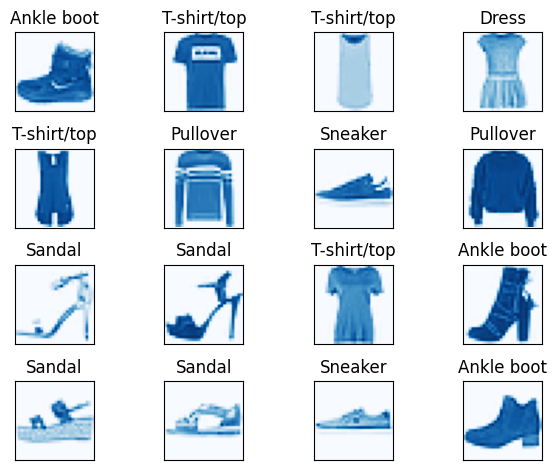

In [ ]:
for i in range(16):
    ax = plt.subplot(4, 4, 1+i)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_title('%s'%(labels[y_train[i]]))
    plt.imshow(x_train[i], cmap=plt.get_cmap('Blues'))

plt.tight_layout()
plt.savefig('fashion_mnist.jpeg', dpi=300)

ขยายมิติของข้อมูล เพื่อเตรียมนำเข้าไป Train ใน Model

In [ ]:
print(x_train.shape, x_test.shape)

x_train = x_train.reshape((x_train.shape[0], 28, 28, 1))
x_test = x_test.reshape((x_test.shape[0], 28, 28, 1))

print(x_train.shape, x_test.shape)

(60000, 28, 28) (10000, 28, 28)
(60000, 28, 28, 1) (10000, 28, 28, 1)


ทำ Scaling

In [ ]:
x_train = x_train / 255.0
x_test = x_test / 255.0

เข้ารหัสผลเฉลยแบบ One-hot Encoding

In [ ]:
y_train = to_categorical(y_train, NUM_CLASSES)
y_test = to_categorical(y_test, NUM_CLASSES)

แบ่งข้อมูลสำหรับ Train และ Validation โดยการสุ่มในสัดส่วน 80:20

In [ ]:
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=VAL_SIZE, random_state=RANDOM_STATE)

x_train.shape, x_val.shape, y_train.shape, y_val.shape

((48000, 28, 28, 1), (12000, 28, 28, 1), (48000, 10), (12000, 10))

นิยาม Model

In [ ]:
#Feature Extraction
model = tf.keras.Sequential()
model.add(tf.keras.layers.Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=INPUT_SHAPE))
model.add(tf.keras.layers.Conv2D(64, (3, 3), activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
model.add(tf.keras.layers.Dropout(0.25))

#Image Classification
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(NUM_CLASSES, activation='softmax'))

model.add(tf.keras.layers.Dense(NUM_CLASSES, activation='softmax'))


In [ ]:
optimizer = tf.keras.optimizers.Adam()
model.compile(optimizer = optimizer, loss = "categorical_crossentropy", metrics=["accuracy"])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 64)        18496     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 64)       0         
 )                                                               
                                                                 
 dropout_1 (Dropout)         (None, 12, 12, 64)        0         
                                                                 
 flatten (Flatten)           (None, 9216)              0         
                                                                 
 dense_2 (Dense)             (None, 128)               1179776   
                                                      

Train Model

In [ ]:
NO_EPOCHS = 15

history = model.fit(x_train, y_train,
                  batch_size=BATCH_SIZE,
                  epochs=NO_EPOCHS,
                  verbose=1,
                  validation_data=(x_val, y_val))

Epoch 1/15
188/188 [==============================] - 161s 850ms/step - loss: 0.6141 - accuracy: 0.7821 - val_loss: 0.3620 - val_accuracy: 0.8683
Epoch 2/15
188/188 [==============================] - 147s 781ms/step - loss: 0.3774 - accuracy: 0.8658 - val_loss: 0.3091 - val_accuracy: 0.8881
Epoch 3/15
188/188 [==============================] - 142s 757ms/step - loss: 0.3267 - accuracy: 0.8827 - val_loss: 0.2736 - val_accuracy: 0.8992
Epoch 4/15
188/188 [==============================] - 141s 751ms/step - loss: 0.2888 - accuracy: 0.8959 - val_loss: 0.2659 - val_accuracy: 0.8983
Epoch 5/15
188/188 [==============================] - 146s 775ms/step - loss: 0.2668 - accuracy: 0.9029 - val_loss: 0.2469 - val_accuracy: 0.9078
Epoch 6/15
188/188 [==============================] - 142s 758ms/step - loss: 0.2477 - accuracy: 0.9111 - val_loss: 0.2354 - val_accuracy: 0.9141
Epoch 7/15
188/188 [==============================] - 140s 743ms/step - loss: 0.2273 - accuracy: 0.9169 - val_loss: 0.2329 -

Plot Loss

In [ ]:
h1 = go.Scatter(y=history.history['loss'],
                    mode="lines",
                    line=dict(
                        width=2,
                        color='blue'),
                        name="loss"
                   )
h2 = go.Scatter(y=history.history['val_loss'],
                    mode="lines",
                    line=dict(
                        width=2,
                        color='red'),
                        name="val_loss"
                   )

data = [h1,h2]
layout1 = go.Layout(title='Loss',
                   xaxis=dict(title='epochs'),
                   yaxis=dict(title=''))
fig1 = go.Figure(data = data, layout=layout1)
plotly.offline.iplot(fig1)

Plot Accuracy

In [ ]:
h1 = go.Scatter(y=history.history['accuracy'],
                    mode="lines",
                    line=dict(
                        width=2,
                        color='blue'),
                        name="acc"
                   )
h2 = go.Scatter(y=history.history['val_accuracy'],
                    mode="lines",
                    line=dict(
                        width=2,
                        color='red'),
                        name="val_acc"
                   )

data = [h1,h2]
layout1 = go.Layout(title='Accuracy',
                   xaxis=dict(title='epochs'),
                   yaxis=dict(title=''))
fig1 = go.Figure(data = data, layout=layout1)
plotly.offline.iplot(fig1)

Predict ภาพจาก Testing Dataset แล้วแปลงค่าความมั่นใจเป็นหมายเลขของ Class



In [ ]:
predicted_classes = model.predict(x_test)
predicted_classes = np.argmax(predicted_classes, axis=1)

313/313 [==============================] - 8s 25ms/step


แปลงผลเฉลยที่มีการเข้ารหัสแบบ One-hot Encoding เป็นหมายเลขของ Class เพื่อใช้ในการสร้าง Confusion Matrix

In [ ]:
y_true = np.argmax(y_test, axis=1)

ก่อนจะแสดง Confusion Matrix ทดลองนับจำนวนข้อมูลในแต่ละ Class ด้วย Counter

In [ ]:
c = Counter(y_true)
c

Counter({9: 1000,
         2: 1000,
         1: 1000,
         6: 1000,
         4: 1000,
         5: 1000,
         7: 1000,
         3: 1000,
         8: 1000,
         0: 1000})

คำนวณ Confusion Matrix จากผลเฉลย และผลลัพธ์จากการ Predict

In [ ]:
cm = confusion_matrix(y_true, predicted_classes)
cm

array([[903,   0,  12,  14,   2,   1,  65,   0,   3,   0],
       [  2, 978,   0,  12,   2,   0,   5,   0,   1,   0],
       [ 16,   0, 888,   8,  41,   0,  47,   0,   0,   0],
       [ 12,   2,  12, 928,  24,   0,  22,   0,   0,   0],
       [  2,   0,  41,  24, 896,   0,  37,   0,   0,   0],
       [  0,   0,   0,   0,   0, 982,   0,  11,   0,   7],
       [116,   0,  48,  23,  65,   0, 744,   0,   4,   0],
       [  0,   0,   0,   0,   0,   6,   0, 982,   0,  12],
       [  2,   0,   3,   5,   1,   1,   4,   3, 980,   1],
       [  0,   0,   0,   0,   0,   2,   0,  29,   1, 968]])

Plot Confusion Matrix ด้วย Plotly

In [ ]:
cm_plot(cm, labels)

แสดง Precision, Recall, F1-score ด้วย classification_report

In [ ]:
print(classification_report(y_true, predicted_classes, target_names=labels, digits=4))

              precision    recall  f1-score   support

 T-shirt/top     0.8575    0.9030    0.8797      1000
     Trouser     0.9980    0.9780    0.9879      1000
    Pullover     0.8845    0.8880    0.8862      1000
       Dress     0.9152    0.9280    0.9215      1000
        Coat     0.8691    0.8960    0.8823      1000
      Sandal     0.9899    0.9820    0.9859      1000
       Shirt     0.8052    0.7440    0.7734      1000
     Sneaker     0.9580    0.9820    0.9699      1000
         Bag     0.9909    0.9800    0.9854      1000
  Ankle boot     0.9798    0.9680    0.9738      1000

    accuracy                         0.9249     10000
   macro avg     0.9248    0.9249    0.9246     10000
weighted avg     0.9248    0.9249    0.9246     10000



เราจะ Plot AUC Curve และคำนวณ ROC ของภาพแต่ละ Class ในทำนองเดียวกับ Binary Classification Model ดังนั้นจึงต้องใช้ค่าความเชื่อมั่นในแต่ละ Class ในการคำนวณ True Positive Rate และ False Positive Rate

In [ ]:
predicted_score = model.predict(x_test)
predicted_score.shape, y_test.shape

Plot ROC Curve และ AUC รวมกันในที่เดียวทั้งหมด 10 Class

In [ ]:
hovertemplate = 'False Positive Rate=%{x:.4f}<br>True Positive Rate=%{y:.4f}<br>Threshold=%{text:.4f}'
fig = go.Figure()
fig.add_shape(
    type='line', line=dict(dash='dash'),
    x0=0, x1=1, y0=0, y1=1
)

for i in range(predicted_score.shape[1]):
    y_real = y_test[:, i]
    y_score = predicted_score[:, i]

    fpr, tpr, threshold = roc_curve(y_real, y_score)
    auc_score = auc(fpr, tpr)

    name = f"{labels[i]}, AUC={auc_score:.4f}"
    fig.add_trace(go.Scatter(x=fpr, y=tpr, name=name, mode='lines', text=threshold, hovertemplate=hovertemplate))

fig.update_layout(
    title='ROC Curve and AUC',
    xaxis_title='False Positive Rate',
    yaxis_title='True Positive Rate',
)

fig.show()

จะเห็นว่า Class 6 (Shirt) มีค่า ROC น้อยกว่า Class อื่นๆ อย่างเห็นได้ชัด ซึ่งแสดงว่า Model มีความสามารถในการแยกภาพ Class 6 ออกจาก Class อื่นๆ ได้ไม่ดีนัก ดังนั้นเราจะกรองภาพเฉพาะ Class นี้ ที่ทำนายผิด มา Plot เพื่อทำความเข้าใจ Dataset ด้วยคำสั่งต่อไปนี้

In [ ]:
y_true, predicted_classes

(array([9, 2, 1, ..., 8, 1, 5]), array([9, 2, 1, ..., 8, 1, 5]))

In [ ]:
false_predict = y_true!=predicted_classes

class6 = y_true==6

false_predict_class6 = class6 & false_predict

Counter(false_predict_class6)

Counter({False: 9744, True: 256})

In [ ]:
class6_img = x_test[false_predict_class6]
class6_y = predicted_classes[false_predict_class6]
false_predict_labels = [labels[class_num] for class_num in class6_y]

In [ ]:
for i in range(16):
    ax = plt.subplot(4, 4, 1+i)

    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_title('%s'%(false_predict_labels[i]), color='red')
    plt.imshow(class6_img[i], cmap=plt.get_cmap('Blues'))

plt.tight_layout()
plt.savefig('class6_fashion_mnist.jpeg', dpi=300)

จากภาพ Class 6 (Shirt) ของ Test Dataset พบว่า Model ทำนายผิดเป็น Class ต่างๆ ได้แก่ Pullover, Dress และ Coat ฯลฯ ซึ่งดูเหมือนว่าบางภาพใน Fashion MNIST Dataset ถูก Label ยังไม่ถูกต้อง ดังเช่นภาพที่ 2 ที่ควร Label เป็น Dress มากกว่า Shirt

ซึ่งถ้าหากพบว่ามีการ Label ไม่ถูกต้องเป็นจำนวนมาก เราอาจต้องกลับไปแก้ไขการ Label Dataset (Train/Validate/Test) เสียก่อน แล้วค่อยกลับมา Train Model ใหม่อีกครั้งครับ